## 12. Time Series and Causality  

This is by far my favorite sort of analysis given how complicated and misunderstood the body of knowledge is.

In [4]:
# Change the Directory
import os
os.chdir("C:\\Users\\datam\\OneDrive\\Desktop\\python") # change as needed

# Verify the change
os.getcwd()

'C:\\Users\\datam\\OneDrive\\Desktop\\python'

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from pyinform import transfer_entropy
from pmdarima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(1966)

### AR1 and MA1 Simulations

Simulate AR(1) and MA(1) processes and plot ACF/PACF, as per the original R code.

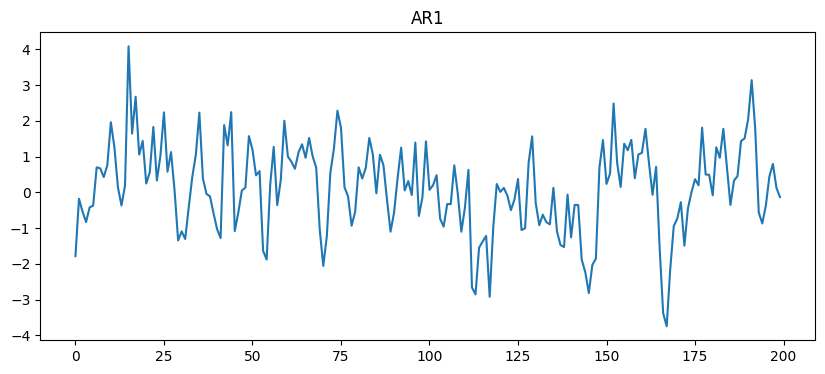

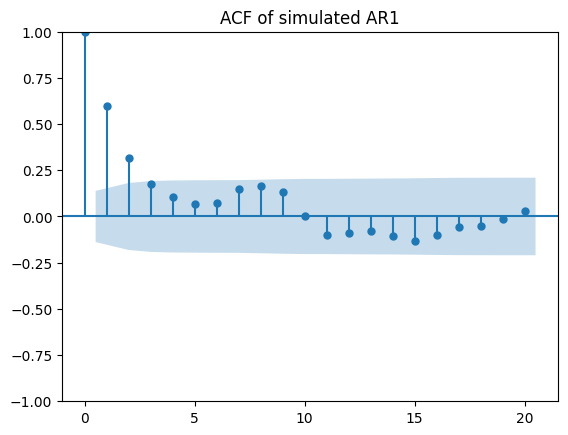

In [5]:
# AR1 simulation: AR(1) with coefficient 0.5
ar1 = ArmaProcess(ar=[1, -0.5], ma=[1]).generate_sample(nsample=200)
plt.figure(figsize=(10, 4))
plt.plot(ar1)
plt.title("AR1")
plt.show()

sm.graphics.tsa.plot_acf(ar1, lags=20)
plt.title("ACF of simulated AR1")
plt.show()

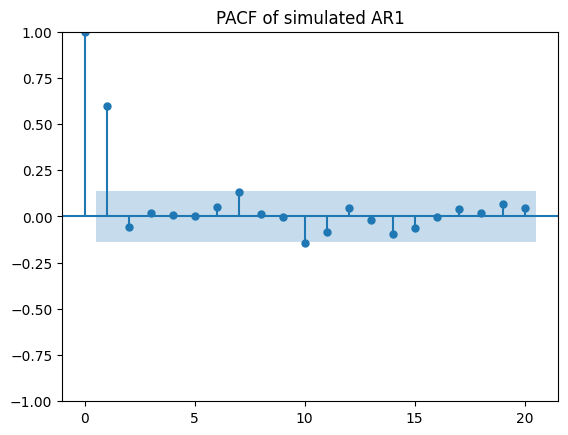

In [6]:
sm.graphics.tsa.plot_pacf(ar1, lags=20)
plt.title("PACF of simulated AR1")
plt.show()

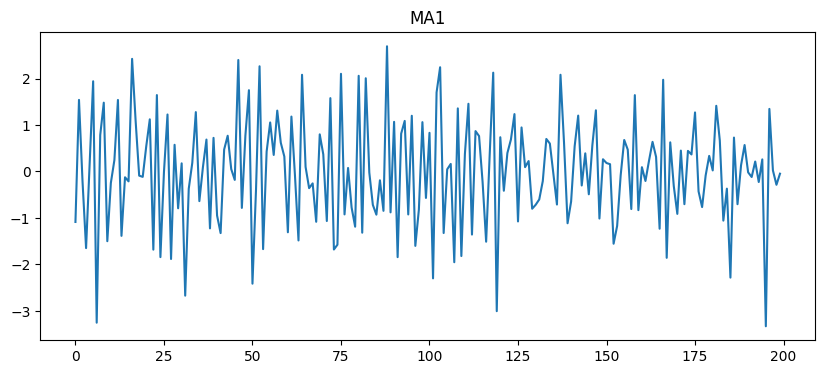

In [7]:
# MA1 simulation: MA(1) with coefficient -0.5
np.random.seed(123)
ma1 = ArmaProcess(ar=[1], ma=[1, -0.5]).generate_sample(nsample=200)
plt.figure(figsize=(10, 4))
plt.plot(ma1)
plt.title("MA1")
plt.show()

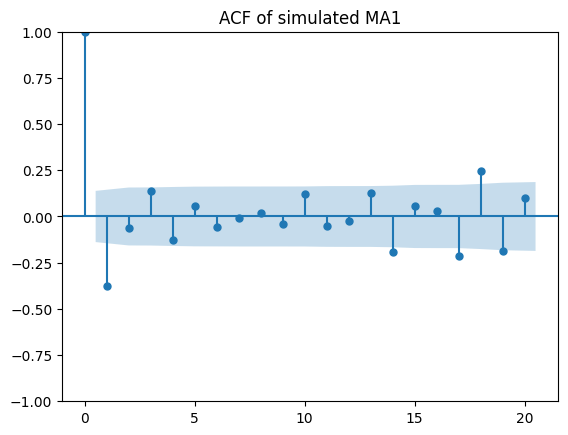

In [8]:
sm.graphics.tsa.plot_acf(ma1, lags=20)
plt.title("ACF of simulated MA1")
plt.show()

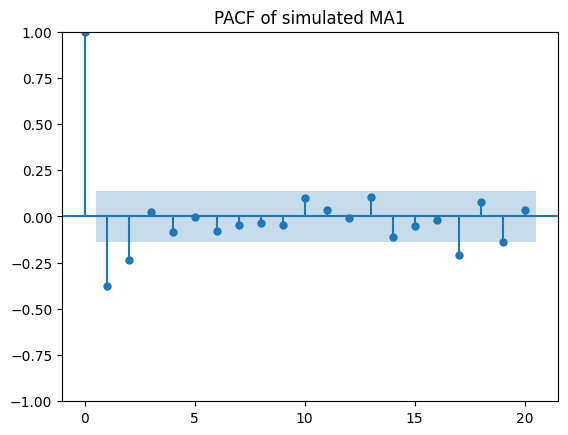

In [9]:
sm.graphics.tsa.plot_pacf(ma1, lags=20)
plt.title("PACF of simulated MA1")
plt.show()

### Climate Data Analysis with ARIMA and ETS

Load `climate.csv` and perform ARIMA and ETS forecasting on the Temp series.

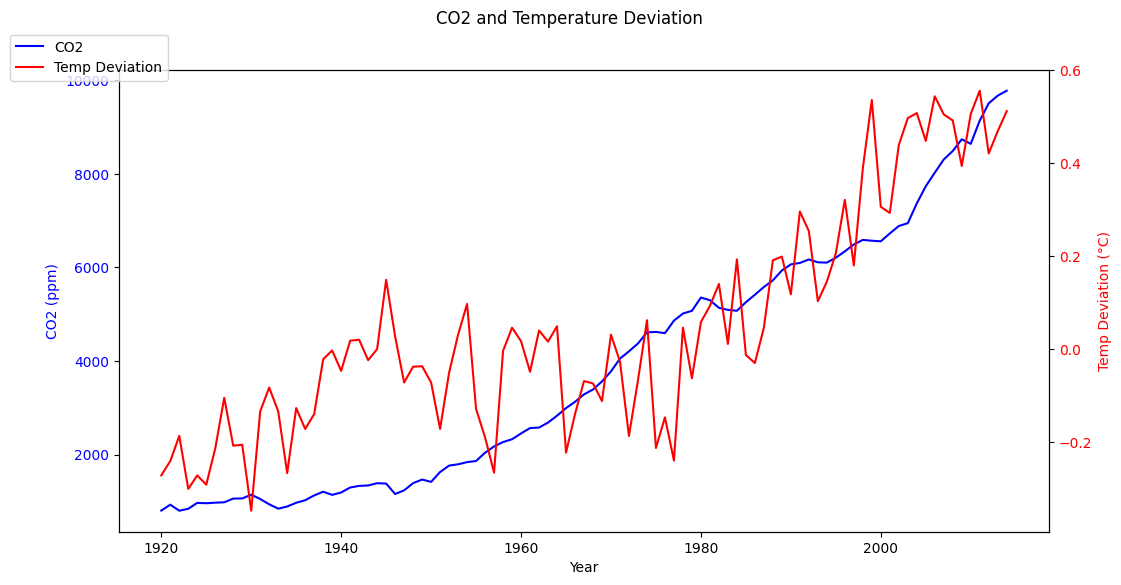

In [10]:
# Load climate data
climate = pd.read_csv("climate.csv")
climate_ts = climate[['CO2', 'Temp']].values
time_index = pd.date_range(start='1919', end='2014', freq='Y')

# Plot CO2 and Temp with separate y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for CO2
ax1.plot(time_index, climate_ts[:, 0], color='blue', label='CO2')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis for Temp Deviation
ax2 = ax1.twinx()
ax2.plot(time_index, climate_ts[:, 1], color='red', label='Temp Deviation')
ax2.set_ylabel('Temp Deviation (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle("CO2 and Temperature Deviation")
fig.legend(loc='center', bbox_to_anchor=(0.1,0.9))
plt.show()

In [11]:
# Split into train and test
train = climate['Temp'][:89]  
test = climate['Temp'][89:]   
climate

,Year,CO2,Temp
0,1919,806,-0.272
1,1920,932,-0.241
2,1921,803,-0.187
3,1922,845,-0.301
4,1923,970,-0.272
...,...,...,...
90,2009,8641,0.506
91,2010,9137,0.556
92,2011,9508,0.421
93,2012,9671,0.469


In [12]:
# ETS Model
ets_model = ETSModel(train, error="add", trend="add", seasonal=None)
ets_fit = ets_model.fit()
print(ets_fit.summary())

                                 ETS Results                                  
Dep. Variable:                   Temp   No. Observations:                   89
Model:                       ETS(AAN)   Log Likelihood                  78.607
Date:                Thu, 13 Mar 2025   AIC                           -147.213
Time:                        18:02:49   BIC                           -134.770
Sample:                             0   HQIC                          -142.198
                                 - 89   Scale                            0.010
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.3175      0.073      4.376      0.000       0.175       0.460
smoothing_trend  3.175e-05        nan        nan        nan         nan         nan
initial_level      -0.2754      

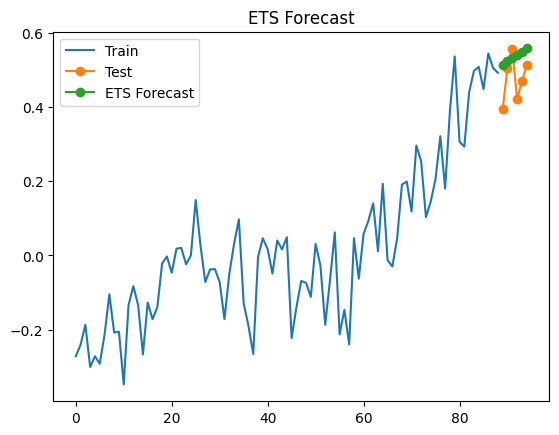

ETS RMSE: 0.07936004497405913


In [13]:
ets_forecast = ets_fit.forecast(steps=6)
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, ets_forecast, label='ETS Forecast', marker='o')
plt.legend()
plt.title('ETS Forecast')
plt.show()

print("ETS RMSE:", np.sqrt(mean_squared_error(test, ets_forecast)))

C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-146.195, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-127.771, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-133.871, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-147.845, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-129.266, Time=0.02 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-148.184, Time=0.19 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-148.201, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-140.214, Time=0.06 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-149.398, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-150.251, Time=0.12 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-148.597, Time=0.10 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-147.242, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-148.800, Time=0.06 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.756 seconds


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


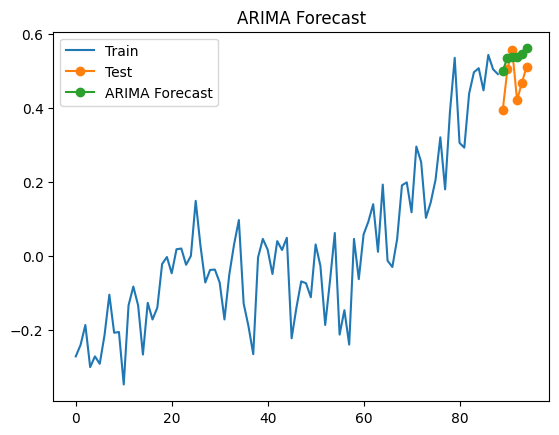

ARIMA RMSE: 0.0763948238002761


In [14]:
# ARIMA Model
arima_model = auto_arima(train, seasonal=False, trace=True)
arima_forecast = arima_model.predict(n_periods=6)
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', marker='o')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

print("ARIMA RMSE:", np.sqrt(mean_squared_error(test, arima_forecast)))

### Granger Causality

Test if CO2 Granger-causes Temp, reporting p-values for each lag up to max_lag.

In [15]:
# Prepare data for Granger Causality
X = climate[['CO2']].values
Y = climate['Temp'].values
data = np.column_stack([Y, X])  # [Temp, CO2]

# Run Granger Causality test (CO2 -> Temp)
print("Granger Causality Test (CO2 -> Temp):")
granger_results = grangercausalitytests(data, maxlag=9, verbose=True)

Granger Causality Test (CO2 -> Temp):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.3956 , p=0.0001  , df_denom=91, df_num=1
ssr based chi2 test:   chi2=17.9691 , p=0.0000  , df=1
likelihood ratio test: chi2=16.4432 , p=0.0001  , df=1
parameter F test:         F=17.3956 , p=0.0001  , df_denom=91, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1828  , p=0.0031  , df_denom=88, df_num=2
ssr based chi2 test:   chi2=13.0682 , p=0.0015  , df=2
likelihood ratio test: chi2=12.2279 , p=0.0022  , df=2
parameter F test:         F=6.1828  , p=0.0031  , df_denom=88, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6389  , p=0.0547  , df_denom=85, df_num=3
ssr based chi2 test:   chi2=8.5686  , p=0.0356  , df=3
likelihood ratio test: chi2=8.1927  , p=0.0422  , df=3
parameter F test:         F=2.6389  , p=0.0547  , df_denom=85, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [16]:
# Run Granger Causality test (CO2 -> Temp)
print("Granger Causality Test (Temp -> CO2):")
granger_results = grangercausalitytests(data, maxlag=9, verbose=True)

Granger Causality Test (Temp -> CO2):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.3956 , p=0.0001  , df_denom=91, df_num=1
ssr based chi2 test:   chi2=17.9691 , p=0.0000  , df=1
likelihood ratio test: chi2=16.4432 , p=0.0001  , df=1
parameter F test:         F=17.3956 , p=0.0001  , df_denom=91, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.1828  , p=0.0031  , df_denom=88, df_num=2
ssr based chi2 test:   chi2=13.0682 , p=0.0015  , df=2
likelihood ratio test: chi2=12.2279 , p=0.0022  , df=2
parameter F test:         F=6.1828  , p=0.0031  , df_denom=88, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6389  , p=0.0547  , df_denom=85, df_num=3
ssr based chi2 test:   chi2=8.5686  , p=0.0356  , df=3
likelihood ratio test: chi2=8.1927  , p=0.0422  , df=3
parameter F test:         F=2.6389  , p=0.0547  , df_denom=85, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

### Transfer Entropy 

Calculate Transfer Entropy between CO2 and Temp.

In [18]:
# This is a work in progress.
co2_norm = (X[:, 0] - X[:, 0].min()) / (X[:, 0].max() - X[:, 0].min())
temp_norm = (Y - Y.min()) / (Y.max() - Y.min())
te_co2_to_temp = transfer_entropy(co2_norm, temp_norm, k=1)
te_temp_to_co2 = transfer_entropy(temp_norm, co2_norm, k=1)
print(f"Transfer Entropy (CO2 -> Temp): {te_co2_to_temp:.3f}")
print(f"Transfer Entropy (Temp -> CO2): {te_temp_to_co2:.3f}")

Transfer Entropy (CO2 -> Temp): 0.000
Transfer Entropy (Temp -> CO2): 0.000


### LSTM Forecasting

Forecast Temperature using LSTM.

In [22]:
# Prepare multivariate data (CO2 and Temp)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(climate[['CO2', 'Temp']])  # Scale both CO2 and Temp

def create_sequences(data, seq_length, target_idx=1):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Sequence of [CO2, Temp]
        y.append(data[i+seq_length, target_idx])  # Next Temp value
    return np.array(X), np.array(y)

seq_length = 10
X_lstm, y_lstm = create_sequences(data_scaled, seq_length)
train_size = 89 - seq_length
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]

In [23]:
# Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2), return_sequences=True),  # 2 features: CO2, Temp
    LSTM(50, activation='relu'),
    Dense(1)  # Predict Temp
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Assign to history

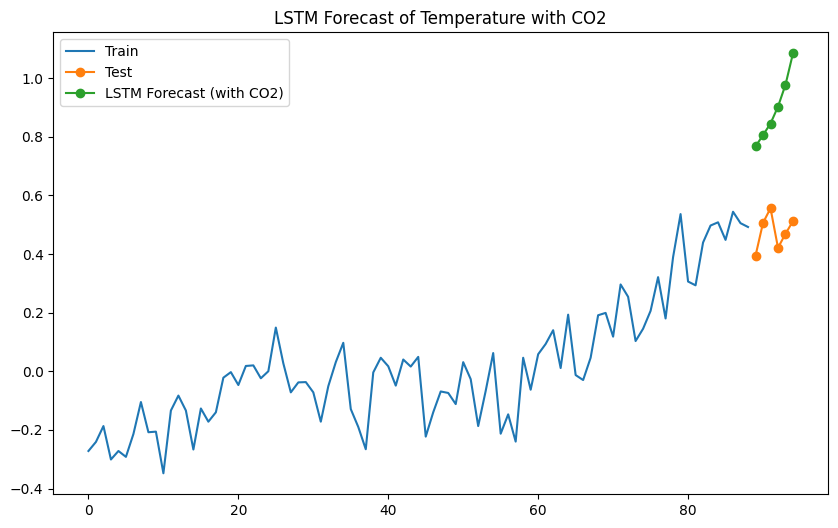

LSTM RMSE (with CO2): 0.43395660193490293


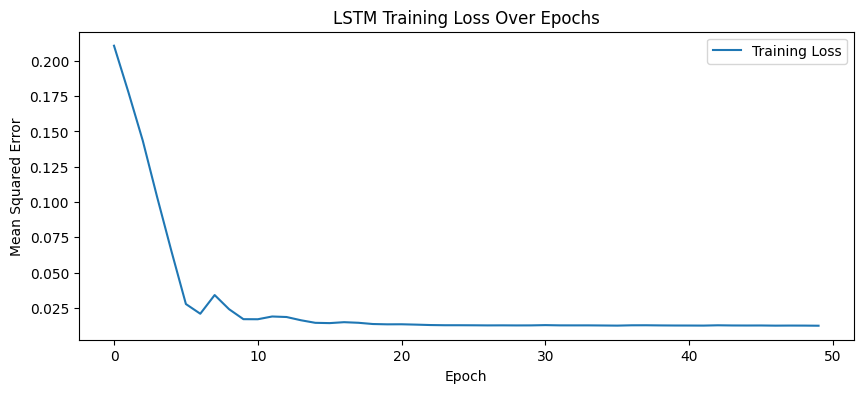

In [24]:
# Forecast Temp with assumed CO2 trend
last_sequence = data_scaled[-seq_length:].copy()  # Last 10 timesteps
lstm_forecast = []
co2_last = X[-6:, 0]  # Last 6 CO2 values (test period)
co2_trend = np.diff(co2_last).mean()  # Average CO2 increase per year

for t in range(6):
    pred = model.predict(last_sequence.reshape(1, seq_length, 2), verbose=0)
    lstm_forecast.append(pred[0, 0])
    # Shift sequence and update with predicted Temp and extrapolated CO2
    next_co2 = last_sequence[-1, 0] + co2_trend / (X[:, 0].max() - X[:, 0].min())  # Normalized CO2 increment
    next_temp = pred[0, 0]
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = [next_co2, next_temp]

# Inverse transform forecasts (only Temp column)
lstm_forecast = np.array(lstm_forecast).reshape(-1, 1)
temp_min, temp_max = climate['Temp'].min(), climate['Temp'].max()
lstm_forecast_unscaled = lstm_forecast * (temp_max - temp_min) + temp_min

# Plot
plt.figure(figsize=(10, 6))
plt.plot(climate.index[:89], Y[:89], label='Train')
plt.plot(climate.index[89:], Y[89:], label='Test', marker='o')
plt.plot(climate.index[89:95], lstm_forecast_unscaled, label='LSTM Forecast (with CO2)', marker='o')
plt.title('LSTM Forecast of Temperature with CO2')
plt.legend()
plt.show()
print("LSTM RMSE (with CO2):", np.sqrt(mean_squared_error(Y[89:], lstm_forecast_unscaled)))

# Optional: Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('LSTM Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()